In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

In [3]:
rs = 99

In [4]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items.csv"
food_df = pd.read_csv(dataset_url)

In [5]:
food_df.shape

(13260, 18)

In [6]:
food_df.columns

Index(['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat',
       'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium',
       'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'class'],
      dtype='object')

In [7]:
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

In [8]:
pd.DataFrame(food_df.replace(0, np.nan).isnull().value_counts())

0
Calories Total Fat Saturated Fat Monounsaturated Fat Polyunsaturated Fat Trans Fat Cholesterol Sodium Total Carbohydrate Dietary Fiber Sugars Sugar Alcohol Protein Vitamin A Vitamin C Calcium Iron  class     
False    False     False         True                True                True      False       False  False              False         False  True          False   False     False     False   False False  689
         True      True          True                True                True      True        False  False              True          False  True          True    True      True      True    True  False  385
         False     False         True                True                True      False       False  False              False         False  True          False   False     True      False   False False  359
                   True          True                True                True      True        False  False              False         False  True          False   True      True      False   False False  345
                                                                                                                                                                    False     False     False   False False  330
...                                                                                                                                                                                                          ...
                                                                                                                                                                              True      True    True  False    1
                   False         True                True                False     True        False  False              False         True   False         True    True      True      True    False False    1
                                 False               False               True      False       False  False              False         True   True          False   True      False     False   True  False    1
                   True          True                True                True      True        False  False              False         False  False         False   False     True      False   False False    1
                                 False               True                True      False       False  False              False         False  True          False   False     True      False   False False    1

[953 rows x 1 columns]

In [9]:
feature_cols = list(food_df.iloc[:,:-1].columns)

In [10]:
food_df.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


In [11]:
food_df.iloc[:,-1:].value_counts()

class          
'In Moderation'    6649
'Less Often'       5621
'More Often'        990
dtype: int64

In [12]:
X_data = food_df.iloc[:,:-1]
Y_data = food_df.iloc[:,-1:]

In [13]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X_data)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
X.min()

0.0

In [15]:
X.max()

1.0

In [16]:
Y = LabelEncoder().fit_transform(Y_data.values.ravel())

In [17]:
np.unique(Y, return_counts = True)

(array([0, 1, 2]), array([6649, 5621,  990]))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = rs, stratify = Y)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

In [19]:
x_train.shape

(10608, 17)

In [20]:
x_test.shape

(2652, 17)

In [21]:
y_train.shape

(10608,)

In [22]:
penalty = 'l2'
multi_class = 'multinomial'
solver = 'lbfgs'
max_iter = 1000
l2_model = LogisticRegression(penalty = penalty, multi_class = multi_class, solver = solver, max_iter = max_iter)

In [23]:
l2_model.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
l2_preds = l2_model.predict(x_test)

In [25]:
def elavuate_metrics(yt, yp):
    result_pos = {}
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    result_pos['Accuracy'] = accuracy_score(yt, yp)
    result_pos['Precision'] = precision
    result_pos['Recall'] = recall
    result_pos['f1score'] = f_beta
    return result_pos

In [26]:
elavuate_metrics(y_test, l2_preds)

{'Accuracy': 0.7794117647058824,
 'Precision': array([0.7353127 , 0.83702213, 0.94666667]),
 'Recall': array([0.87518797, 0.74021352, 0.35858586]),
 'f1score': array([0.79917611, 0.78564684, 0.52014652])}

In [27]:
penalty = 'l1'
multi_class = 'multinomial'
solver = 'saga'
max_iter = 1000
l1_model = LogisticRegression(penalty = penalty, multi_class = multi_class, solver = solver, max_iter = max_iter)

In [28]:
l1_model.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
l1_preds = l1_model.predict(x_test)

In [30]:
elavuate_metrics(y_test, l1_preds)

{'Accuracy': 0.805052790346908,
 'Precision': array([0.78382148, 0.83070866, 0.82673267]),
 'Recall': array([0.84511278, 0.75088968, 0.84343434]),
 'f1score': array([0.81331404, 0.78878505, 0.835     ])}

In [31]:
odd_ratios = l1_model.predict_proba(x_test[:1,:])[0]

In [32]:
odd_ratios

array([8.38537187e-01, 1.61460745e-01, 2.06798444e-06])

In [33]:
cf = confusion_matrix(y_test, l1_preds)

[Text(0.5, 1.0, 'Confusion Matrix')]

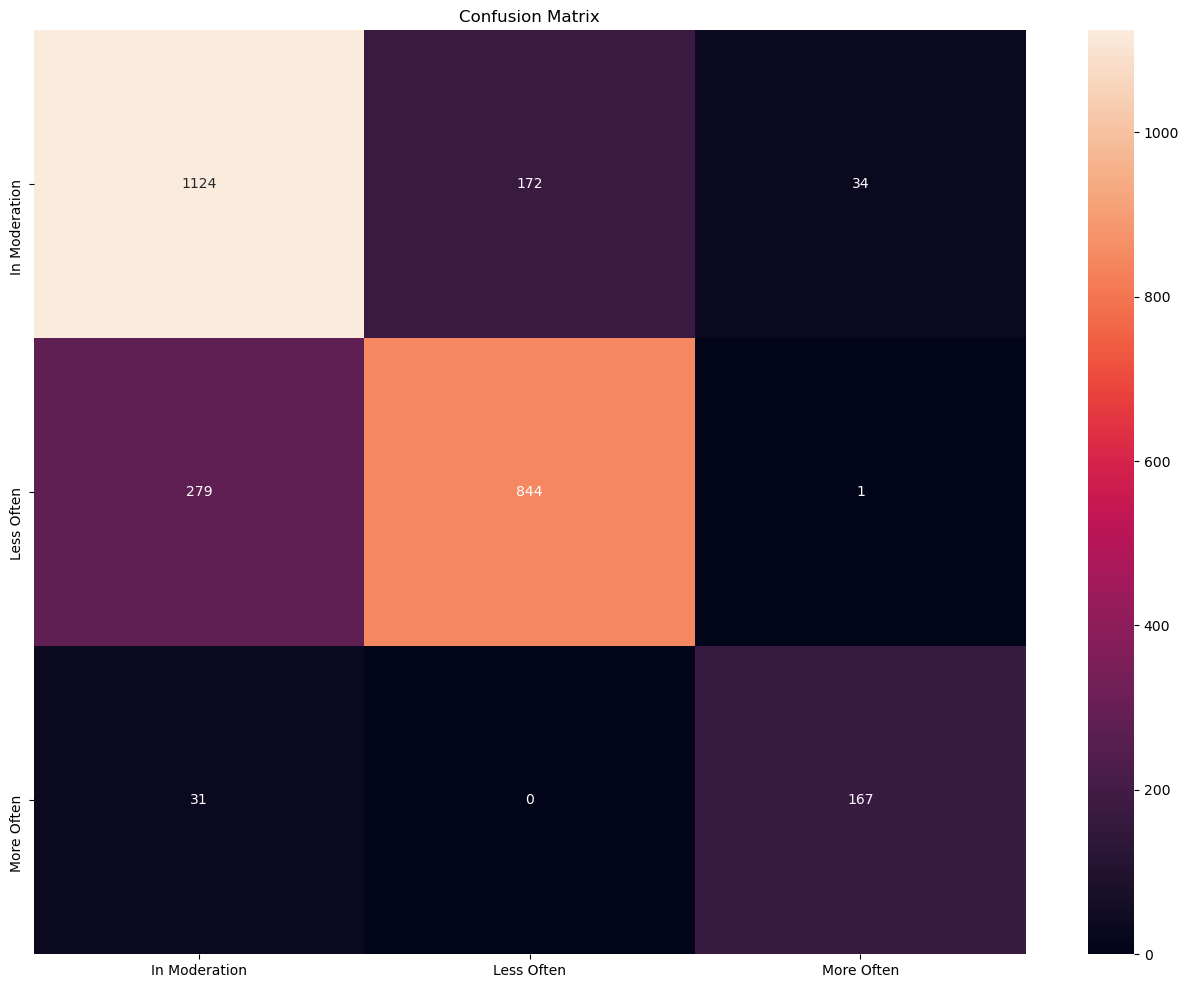

In [35]:
plt.figure(figsize=(16,12))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["In Moderation", "Less Often", "More Often"], 
                 yticklabels=["In Moderation", "Less Often", "More Often"])
ax.set(title= 'Confusion Matrix')

In [36]:
l1_model.coef_

array([[  10.1050271 ,    0.        ,    0.        ,    5.79439782,
           0.        ,   -2.55629486,    0.        ,    0.73111036,
           0.        ,   33.01768041,    0.        ,    0.        ,
           4.79515124,    0.        ,    0.        ,    0.59898402,
           0.        ],
       [   0.        ,    4.46487639,   23.84564822,    0.        ,
           0.        ,    0.        ,    5.61107882,    0.        ,
           2.08465247,    0.        ,   14.98482098,    3.91848357,
           0.        ,   -1.7209475 ,    0.        ,   -1.29895404,
           0.        ],
       [-111.09762694,  -31.74455084,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,   -1.20507778,
         -36.87705292,    0.        ,   -4.39767619,    0.        ,
          -0.40567545,    0.        ,    0.        ,    0.        ,
           0.        ]])

In [44]:
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index,:], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    
    coef_dict = {k:v for k,v in sorted(coef_dict.items(), key = lambda item:item[1])}
    return coef_dict

In [39]:
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

In [40]:
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [45]:
coef_dict = get_feature_coefs(l1_model, 1, feature_cols)

In [46]:
coef_dict

{'Vitamin A': -1.7209475034338015,
 'Calcium': -1.2989540381326166,
 'Total Carbohydrate': 2.0846524719060673,
 'Sugar Alcohol': 3.9184835658642547,
 'Total Fat': 4.4648763948736,
 'Cholesterol': 5.611078817986298,
 'Sugars': 14.984820982263614,
 'Saturated Fat': 23.845648215345197}

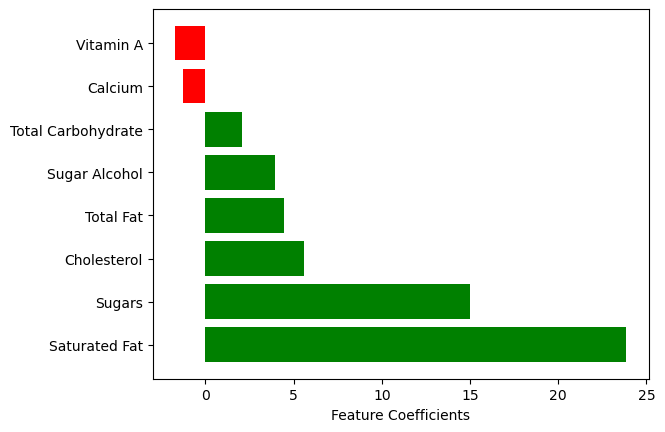

In [47]:
visualize_coefs(coef_dict)

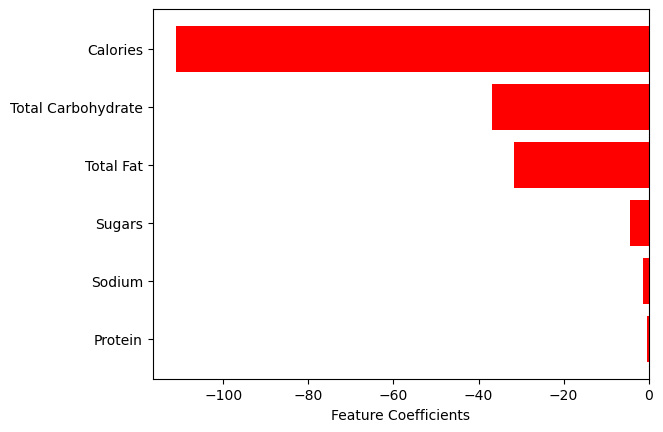

In [48]:
coef_dict = get_feature_coefs(l1_model, 2, feature_cols)
visualize_coefs(coef_dict)